# 2019/02/18    - test campaign 2, day 6

##     4.6 Measure M1 and M3 LSST bending modes (labeled 3.7; M1 BM 17,18,20-22,24-27; same for M3)
##    4.8 Optimize M1 only figure using LSST bending modes 1 and 2 only (2 iterations)
##    4.7 Measure M1 and M3 influence functions (M1 IF 41-50; same for M3)

In [6]:
from M1M3tools import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import glob
import pandas as pd

%matplotlib inline
plt.jet()

dateID = 190218

<Figure size 432x288 with 0 Axes>

### LSST bending mode measurements: 17, 18,  20, 21, 22, 24-27
### M1 first

4-6 bending mode 17 ------ irow = 0, icol = 0, -----------------------------
/Processed/190218_4-6 (Labeled as 3-7)/190218 3-7 M1 bm+17-1 burst50 morph.h5: Mon Feb 18 09:15:49 2019 
4-6 bending mode 17 ------ irow = 0, icol = 1, -----------------------------
/Processed/190218_4-6 (Labeled as 3-7)/190218 3-7 M1 bm-17-1 burst50 morph.h5: Mon Feb 18 09:18:55 2019 
4-6 bending mode 17 ------ irow = 0, icol = 2, -----------------------------
/Processed/190218_4-6 (Labeled as 3-7)/190218 3-7 M1 bm-17-2 burst50 morph.h5: Mon Feb 18 09:21:51 2019 
4-6 bending mode 17 ------ irow = 0, icol = 3, -----------------------------
/Processed/190218_4-6 (Labeled as 3-7)/190218 3-7 M1 bm+17-2 burst50 morph.h5: Mon Feb 18 09:24:58 2019 
4-6 bending mode 18 ------ irow = 1, icol = 0, -----------------------------
/Processed/190218_4-6 (Labeled as 3-7)/190218 3-7 M1 bm+18-1 burst50 morph.h5: Mon Feb 18 10:33:41 2019 
4-6 bending mode 18 ------ irow = 1, icol = 1, -----------------------------
/Processed/19

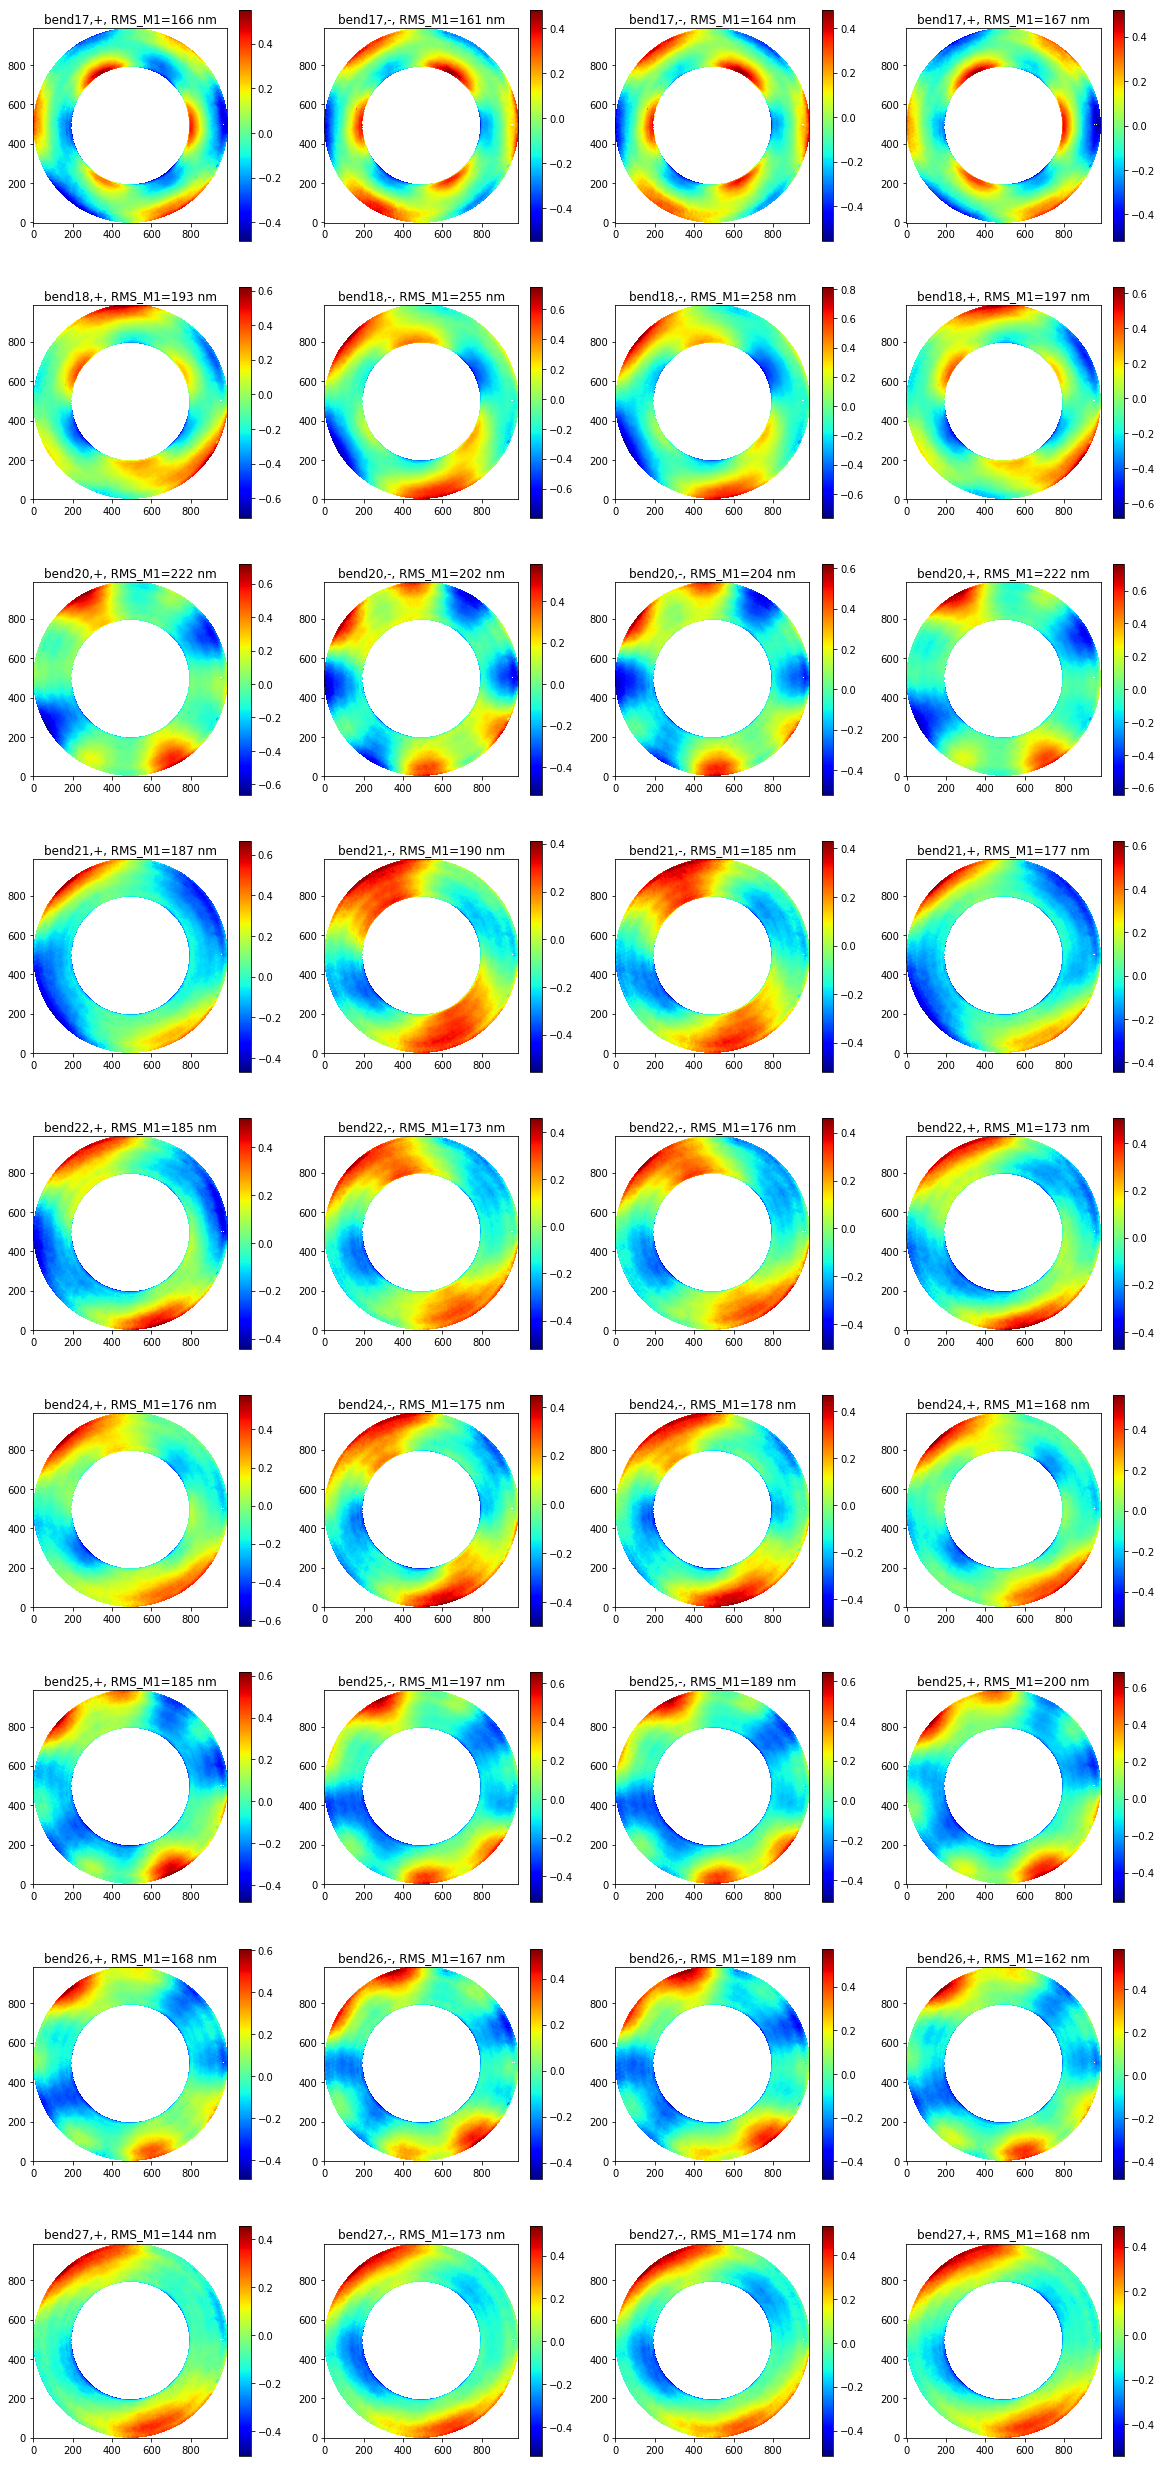

In [3]:
testID = '4-6'
testID1 = '3-7'
iter = ' (Labeled as 3-7)'
fig, ax = plt.subplots(9,4,figsize=(20,5*9))
i = 0
for modeID in np.array([17, 18, 20, 21, 22, 24, 25, 26, 27]):
    signedBend = ['+%d-1'%modeID, '-%d-1'%modeID, '-%d-2'%modeID, '+%d-2'%modeID]
    for bend in signedBend:
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1
        print('%s bending mode %s ------ irow = %d, icol = %d, -----------------------------'%(
            testID, modeID, irow, icol))
        fileset = sorted(glob.glob('%s/Processed/%d_%s%s/%d %s M1 bm%s*burst*morph.h5'%(
            dataDir, dateID, testID, iter, dateID, testID1, bend)))
        m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

        m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm

        img = ax[irow][icol].imshow(m1s, origin='lowerleft')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('bend%d,%s, RMS_M1=%.0f nm'%(modeID, bend[0], m1rms))

## Then M3

4-6 bending mode 17 ------ irow = 0, icol = 0, -----------------------------
/Processed/190218_4-6 (Labeled as 3-7)/190218 3-7 M3 bm+17-1 burst20 morph -.h5: Mon Feb 18 12:31:34 2019 
4-6 bending mode 17 ------ irow = 0, icol = 1, -----------------------------
/Processed/190218_4-6 (Labeled as 3-7)/190218 3-7 M3 bm-17-1 burst20 morph -.h5: Mon Feb 18 12:32:38 2019 
4-6 bending mode 17 ------ irow = 0, icol = 2, -----------------------------
/Processed/190218_4-6 (Labeled as 3-7)/190218 3-7 M3 bm-17-2 burst20 morph -.h5: Mon Feb 18 12:33:31 2019 
4-6 bending mode 17 ------ irow = 0, icol = 3, -----------------------------
/Processed/190218_4-6 (Labeled as 3-7)/190218 3-7 M3 bm+17-2 burst20 morph -.h5: Mon Feb 18 12:34:36 2019 
4-6 bending mode 18 ------ irow = 1, icol = 0, -----------------------------
/Processed/190218_4-6 (Labeled as 3-7)/190218 3-7 M3 bm+18-1 burst20 morph -.h5: Mon Feb 18 12:35:42 2019 
4-6 bending mode 18 ------ irow = 1, icol = 1, -----------------------------
/Pr

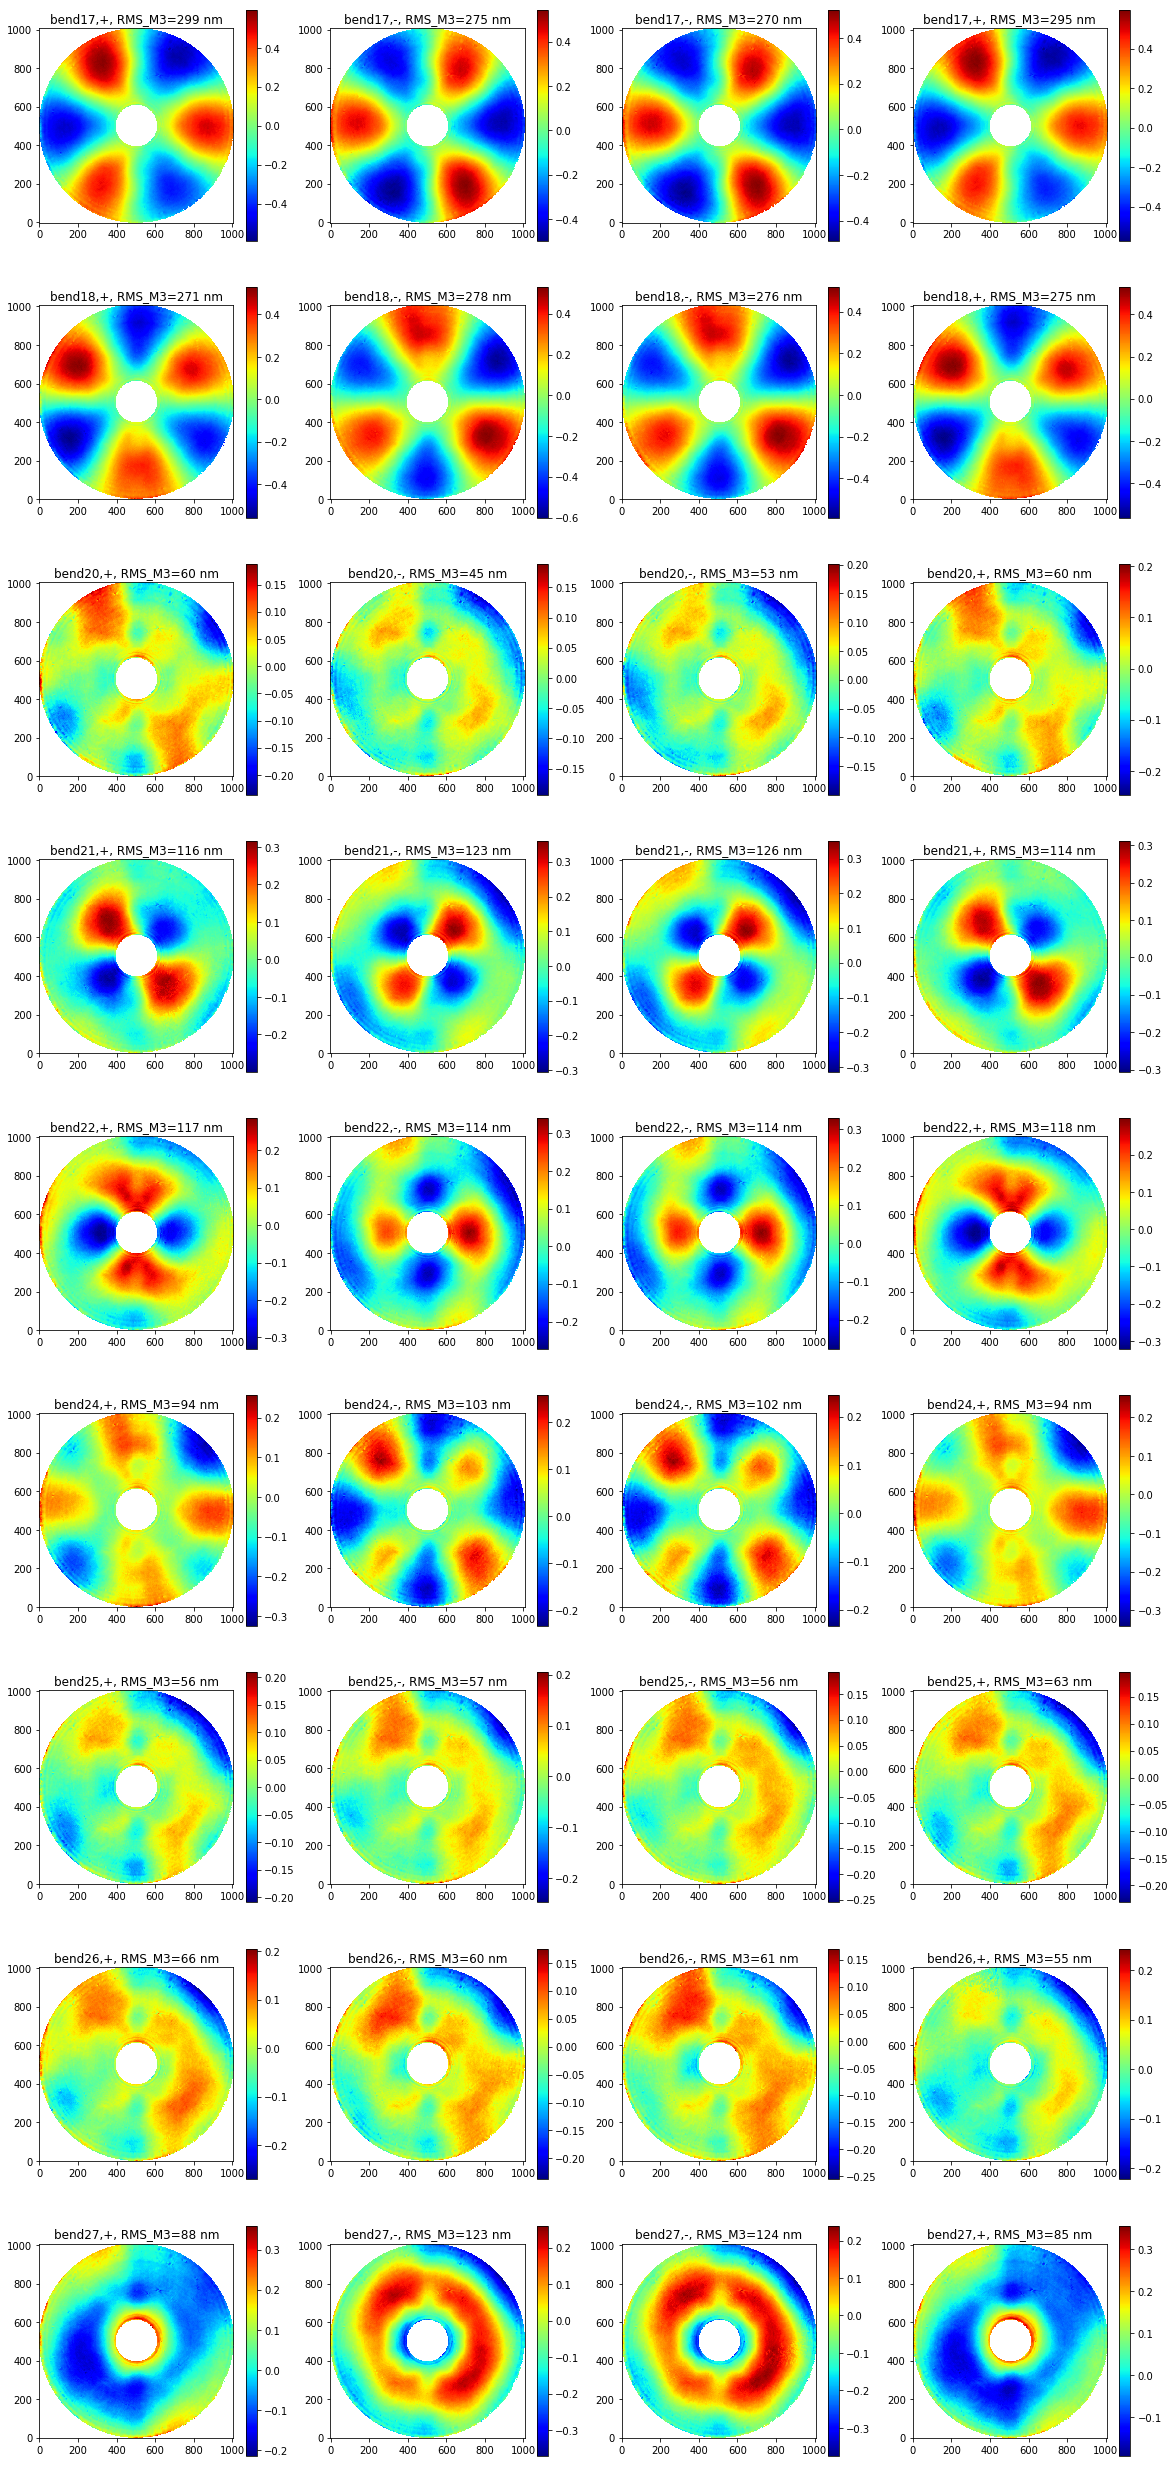

In [4]:
testID = '4-6'
testID1 = '3-7'
iter = ' (Labeled as 3-7)'
fig, ax = plt.subplots(9,4,figsize=(20,5*9))
i = 0
for modeID in np.array([17, 18, 20, 21, 22, 24, 25, 26, 27]):
    signedBend = ['+%d-1'%modeID, '-%d-1'%modeID, '-%d-2'%modeID, '+%d-2'%modeID]
    for bend in signedBend:
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1
        print('%s bending mode %s ------ irow = %d, icol = %d, -----------------------------'%(
            testID, modeID, irow, icol))
        pattern = '%s/Processed/%d_%s%s/%d %s M3 bm%s*burst*morph -.h5'%(
            dataDir, dateID, testID, iter, dateID, testID1, bend)
        fileset = sorted(glob.glob(pattern))
        #print(pattern)
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)

        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm

        img = ax[irow][icol].imshow(m3s, origin='lowerleft')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('bend%d,%s, RMS_M3=%.0f nm'%(modeID, bend[0], m3rms))

### The measured bending modes
Mirror Lab scaled the forces and the shapes, so that the forces corresponding to these shapes are still 1N RMS forces

4-6 bending mode 17 ------ irow = 0, icol = 0, -----------------------------
/Processed/190218_4-6 (Labeled as 3-7)/Combined/Combined M1M3 Map Mode number-17.h5: date not in h5 file. 
/Processed/190218_4-6 (Labeled as 3-7)/Combined/Combined M1M3 Map Mode number-17.h5: date not in h5 file. 
4-6 bending mode 18 ------ irow = 0, icol = 1, -----------------------------
/Processed/190218_4-6 (Labeled as 3-7)/Combined/Combined M1M3 Map Mode number-18.h5: date not in h5 file. 
/Processed/190218_4-6 (Labeled as 3-7)/Combined/Combined M1M3 Map Mode number-18.h5: date not in h5 file. 
4-6 bending mode 20 ------ irow = 0, icol = 2, -----------------------------
/Processed/190218_4-6 (Labeled as 3-7)/Combined/Combined M1M3 Map Mode number-20.h5: date not in h5 file. 
/Processed/190218_4-6 (Labeled as 3-7)/Combined/Combined M1M3 Map Mode number-20.h5: date not in h5 file. 
4-6 bending mode 21 ------ irow = 1, icol = 0, -----------------------------
/Processed/190218_4-6 (Labeled as 3-7)/Combined/Co

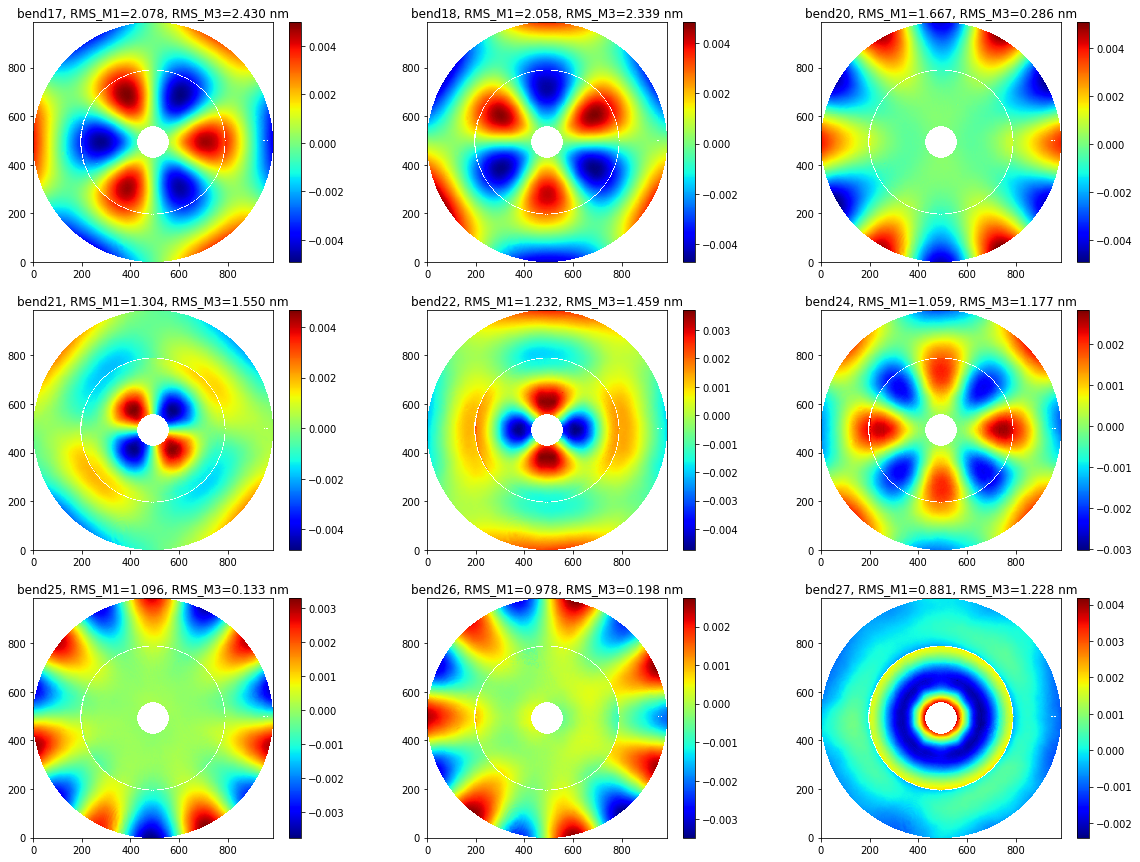

In [5]:
testID = '4-6'
testID1 = '3-7'
iter = ' (Labeled as 3-7)'
fig, ax = plt.subplots(3,3,figsize=(20,5*3))
i = 0
for modeID in np.array([17, 18, 20, 21, 22, 24, 25, 26, 27]):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bending mode %s ------ irow = %d, icol = %d, -----------------------------'%(
        testID, modeID, irow, icol))
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/Combined/Combined*-%d.h5'%(
    dataDir, dateID, testID, iter, modeID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset, '/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset, '/M3Data')

    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm

    img = ax[irow][icol].imshow(s, origin='lowerleft')
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('bend%d, RMS_M1=%.3f, RMS_M3=%.3f nm'%(modeID, m1rms, m3rms))


### Scaling factors that need to be added to the FEA bending modes

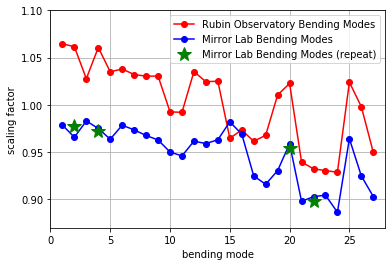

In [5]:
# for modes 1-16,19,23, read in results from 190213
# add the missing modes
bb = np.loadtxt('data/LSST_BM_scale.txt', skiprows=1)
modeID = bb[:, 0].astype(int)
modeID1 = np.array([17, 18, 20, 21, 22, 24, 25, 26, 27])
nmode = len(modeID)
scaleF = np.zeros(nmode)
crossTalk = np.zeros((nmode, nmode))
testID = '4-6'
iter = ' (Labeled as 3-7)'
for i in modeID:
    resultsFile = '%s/Combined/FitCoeff-Mode%d.csv'%(BMPatchDir, i)
    #print(resultsFile)
    df = pd.read_csv(resultsFile, header=None)
    crossTalk[:, i-1] = df[2]
    bb[i-1,1] = max(df[2])
    
plt.plot(bb[:,0], bb[:,1], '-ro',label='Rubin Observatory Bending Modes')
plt.grid()
plt.xlabel('bending mode')
plt.ylabel('scaling factor')

#Mirror Lab bending modes
aa = np.loadtxt('data/ML_BM_scale.txt', skiprows=1)
modeID1 = aa[:,0]
scaleF1 = aa[:,1]
plt.plot(modeID1, scaleF1, '-bo', label='Mirror Lab Bending Modes')
idx = ~np.isnan(aa[:,2])
plt.plot(modeID1[idx], aa[idx,2], 'g*', markersize = 15, label='Mirror Lab Bending Modes (repeat)')
plt.ylim([0.87, 1.1])
plt.xlim([0, 28])
plt.legend();

### Note that scaling factor less than 1 means FEA model is more flexible than real mirror (Mirror Lab FEA)
### For LSST, the lower order modes (<15) are general stiffer than real mirror.

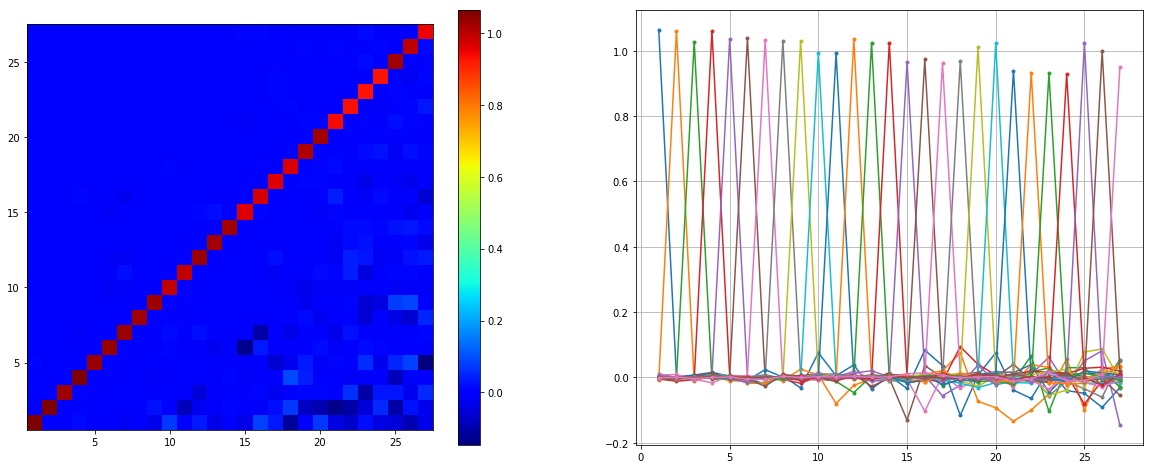

In [3]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
img = ax[0].imshow(crossTalk, origin='lower', extent=[0.5, 27.5, 0.5, 27.5])
plt.colorbar(img, ax=ax[0])
img = ax[1].plot(modeID, crossTalk.transpose(),'.-')
ax[1].grid()

### Mode 18 has up to ~15% of Mode 1?
* Has to be thermal drift. Mode 1 is very easy to creep in. Look at thermal profile for 192018 in checkTfromEFD.ipynb. 

### Mode 15 has up to ~15% of Mode 6?
* both are x-comas. 15 is higher order.

In [4]:
# save LSST_BM_scale.txt, now with newly measured scale factors
np.savetxt('data/LSST_BM_scale.txt', bb, fmt='%d \t %.5f', header='modeID \t scaleF', comments='')
np.savetxt('data/LSST_BM_XTalk.txt', crossTalk)

### Residual maps from fitting to FEA bending modes

4-6 bending mode 17 ------ irow = 0, icol = 0, -----------------------------
/LSST_BM_patch_190508/Combined/Combined M1M3 Map Mode number-17-Residual.h5: date not in h5 file. 
/LSST_BM_patch_190508/Combined/Combined M1M3 Map Mode number-17-Residual.h5: date not in h5 file. 
4-6 bending mode 18 ------ irow = 0, icol = 1, -----------------------------
/LSST_BM_patch_190508/Combined/Combined M1M3 Map Mode number-18-Residual.h5: date not in h5 file. 
/LSST_BM_patch_190508/Combined/Combined M1M3 Map Mode number-18-Residual.h5: date not in h5 file. 
4-6 bending mode 20 ------ irow = 0, icol = 2, -----------------------------
/LSST_BM_patch_190508/Combined/Combined M1M3 Map Mode number-20-Residual.h5: date not in h5 file. 
/LSST_BM_patch_190508/Combined/Combined M1M3 Map Mode number-20-Residual.h5: date not in h5 file. 
4-6 bending mode 21 ------ irow = 1, icol = 0, -----------------------------
/LSST_BM_patch_190508/Combined/Combined M1M3 Map Mode number-21-Residual.h5: date not in h5 file. 

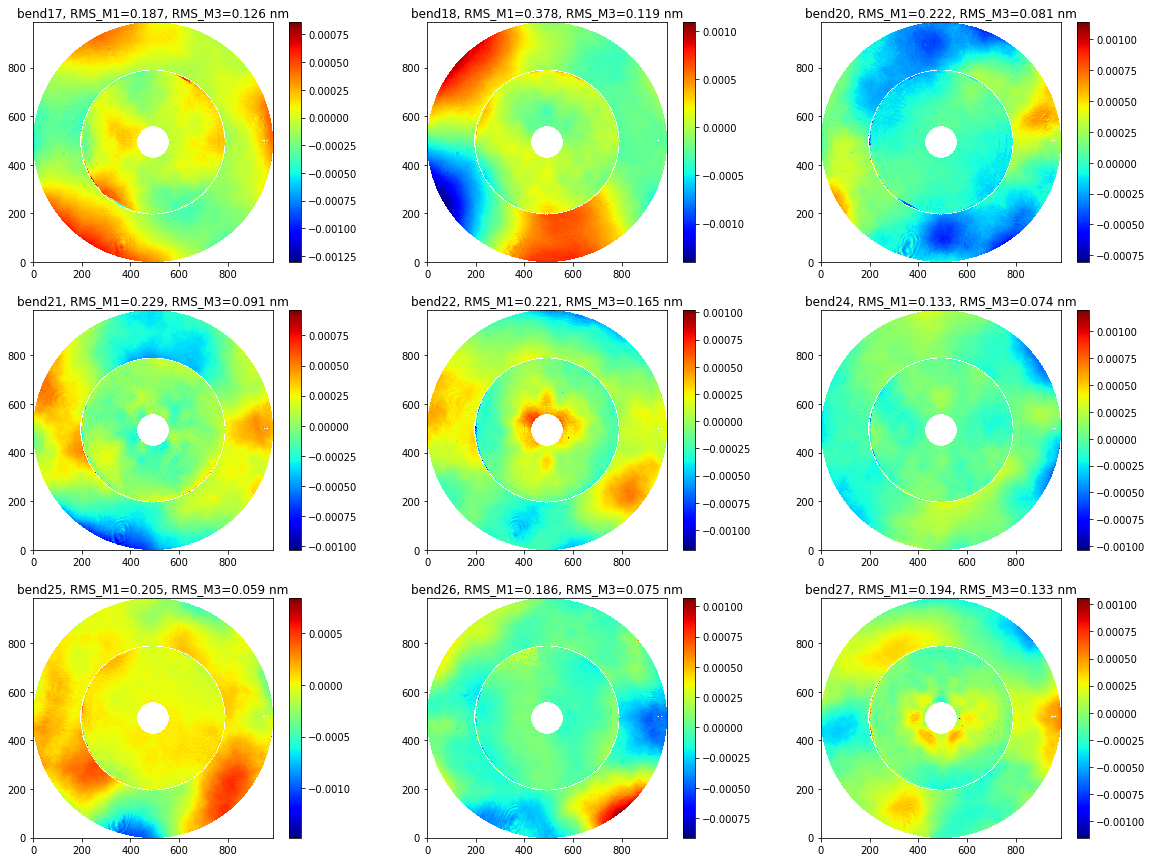

In [5]:
testID = '4-6'
testID1 = '3-7'
iter = ' (Labeled as 3-7)'
fig, ax = plt.subplots(3,3,figsize=(20,5*3))
i = 0
for modeID in np.array([17, 18, 20, 21, 22, 24, 25, 26, 27]):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bending mode %s ------ irow = %d, icol = %d, -----------------------------'%(
        testID, modeID, irow, icol))
    fileset = sorted(glob.glob('%s/Combined/Combined*-%d-Residual.h5'%(
        BMPatchDir, modeID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset, '/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset, '/M3Data')

    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm

    img = ax[irow][icol].imshow(s, origin='lowerleft')
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('bend%d, RMS_M1=%.3f, RMS_M3=%.3f nm'%(modeID, m1rms, m3rms))

### M1 single actuator influence function: 41-50. 
The list of actuators ranked by priority were given to the Mirror Lab by LSST

In [45]:
testID = '4-7'
nIF = 10 # we measured 13IFs
pattern = '%s/Processed/%d_%s/19*filename list.xlsx'%(
    dataDir, dateID, testID)
summaryFile = glob.glob(pattern)[0]
df = pd.read_excel(summaryFile, sheet_name = 'Corrected Maps', skiprows=2)
nstart = 28
aa = np.array(df['Actuator'][nstart:])
idx = np.unique(aa, return_index=True)[1] 
mode2actID = [aa[idx] for idx in sorted(idx)]

4-7 Influence function 41 --- Actuator 416 --- irow = 0, icol = 0, -----------------------------
/Processed/190218_4-7/190218 4-7 M1 if+41-1 burst50 morph -.h5: Mon Feb 18 14:12:03 2019 
4-7 Influence function 41 --- Actuator 416 --- irow = 0, icol = 1, -----------------------------
/Processed/190218_4-7/190218 4-7 M1 if-41-1 burst50 morph -.h5: Mon Feb 18 14:15:13 2019 
4-7 Influence function 41 --- Actuator 416 --- irow = 0, icol = 2, -----------------------------
/Processed/190218_4-7/190218 4-7 M1 if-41-2 burst50 morph -.h5: Mon Feb 18 14:18:11 2019 
4-7 Influence function 41 --- Actuator 416 --- irow = 0, icol = 3, -----------------------------
/Processed/190218_4-7/190218 4-7 M1 if+41-2 burst50 morph -.h5: Mon Feb 18 14:21:21 2019 
4-7 Influence function 42 --- Actuator 216 --- irow = 1, icol = 0, -----------------------------
/Processed/190218_4-7/190218 4-7 M1 if+42-1 burst50 morph -.h5: Mon Feb 18 14:26:42 2019 
4-7 Influence function 42 --- Actuator 216 --- irow = 1, icol = 1

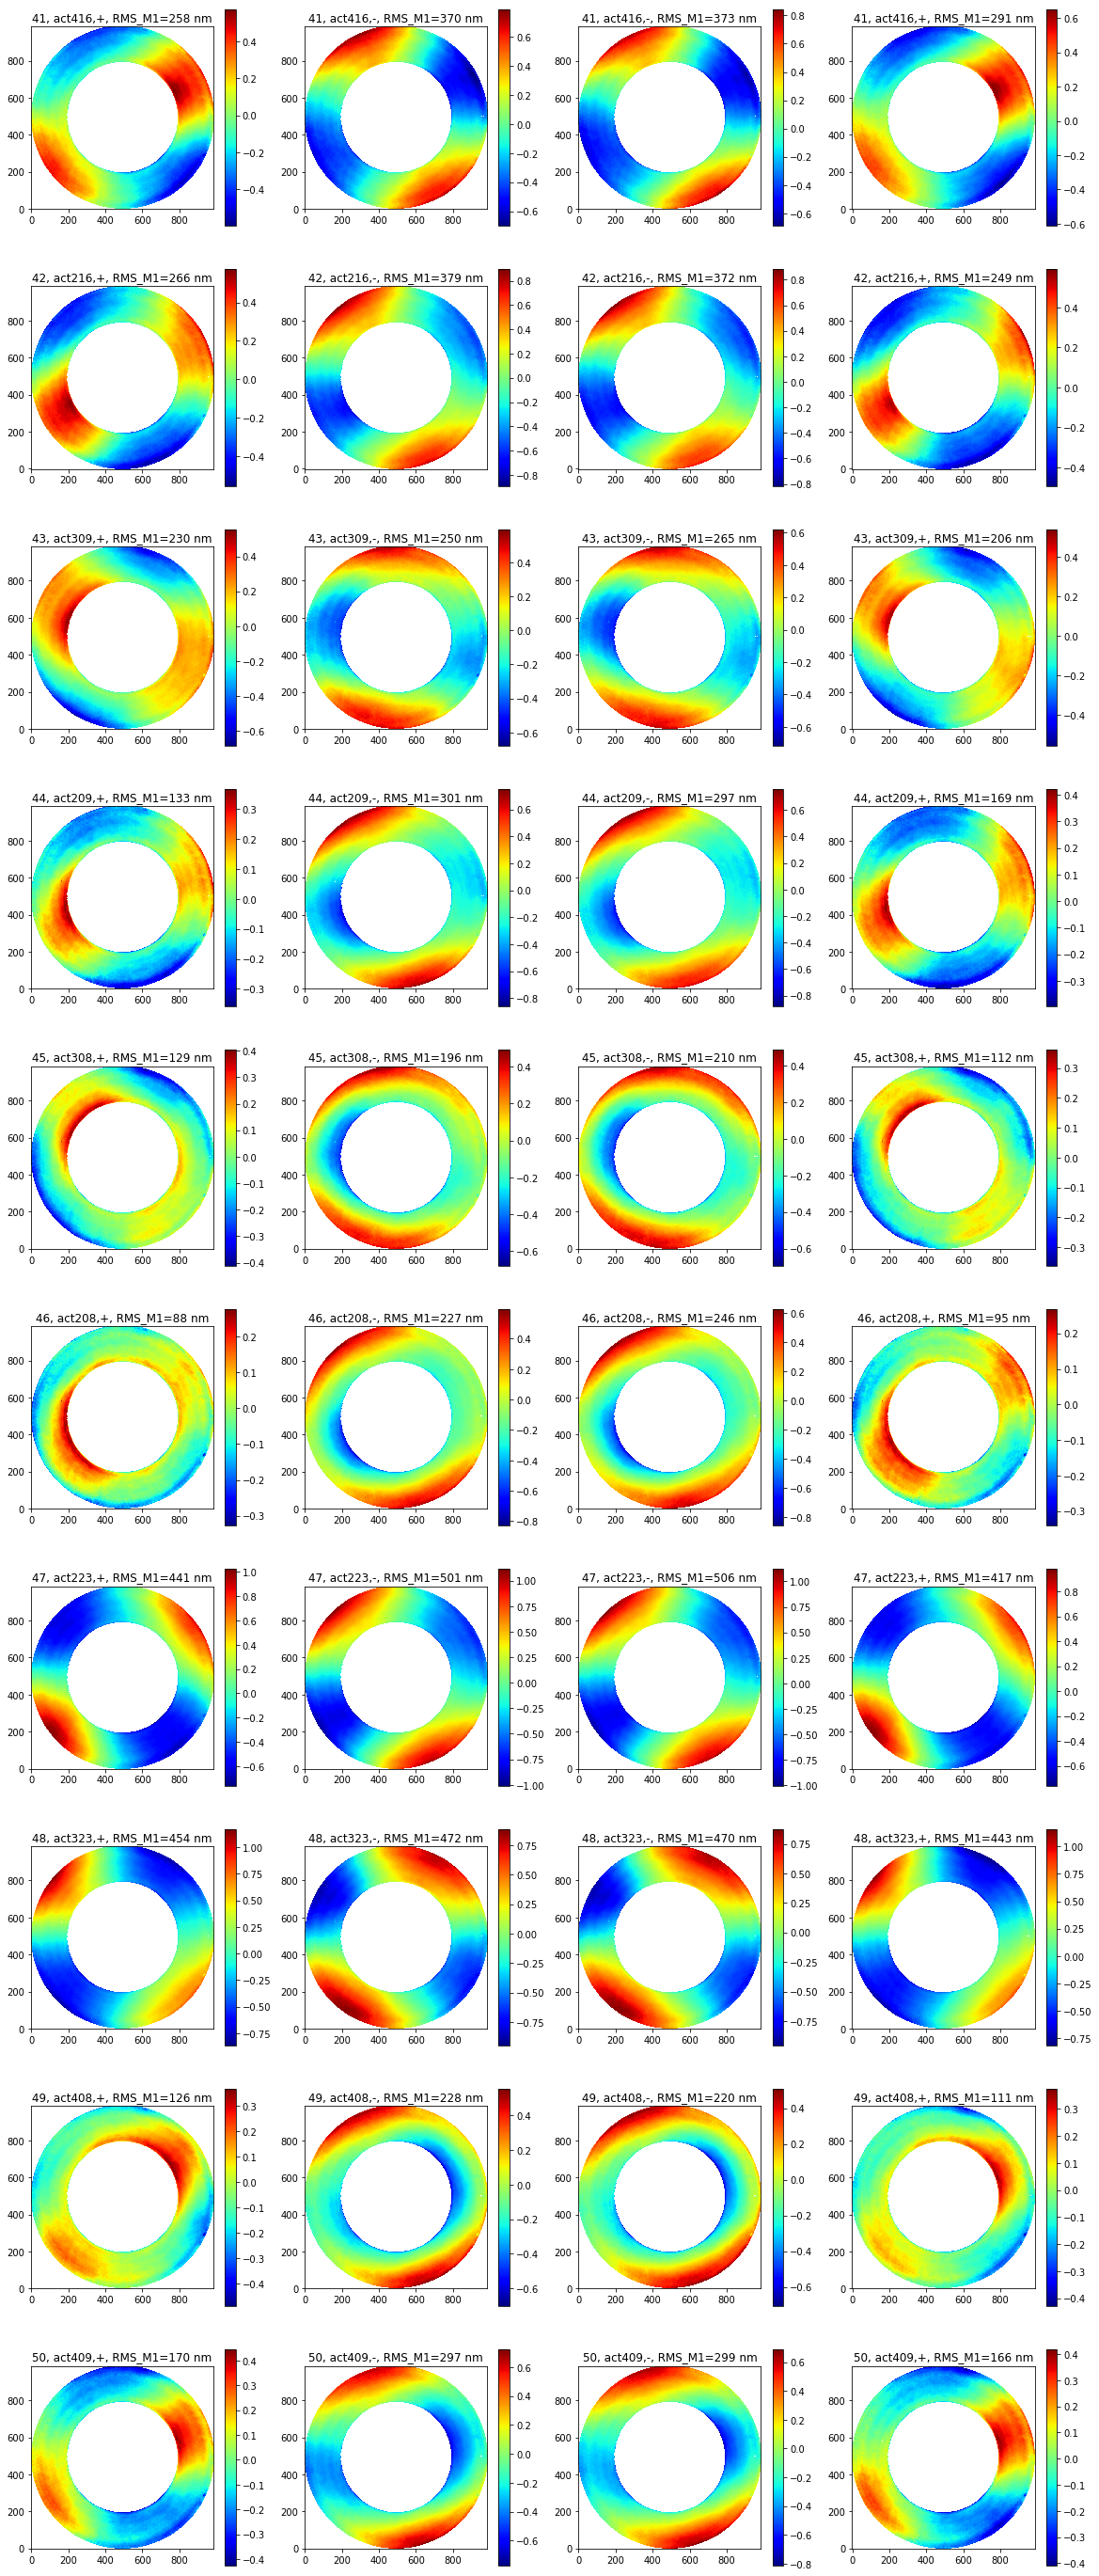

In [48]:
fig, ax = plt.subplots(nIF,4,figsize=(20,5*nIF))
i = 0
imode = 0
for modeID in np.arange(41, 51):
    imode += 1
    signedBend = ['+%d-1'%modeID, '-%d-1'%modeID, '-%d-2'%modeID, '+%d-2'%modeID]
    for bend in signedBend:
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1
        print('%s Influence function %s --- Actuator %d --- irow = %d, icol = %d, -----------------------------'%(
            testID, modeID, mode2actID[imode-1], irow, icol))
        fileset = sorted(glob.glob('%s/Processed/%d_%s/%d %s M1 if%s*burst*morph -.h5'%(
            dataDir, dateID, testID, dateID, testID, bend)))
        m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

        m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm

        img = ax[irow][icol].imshow(m1s, origin='lowerleft')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('%d, act%d,%s, RMS_M1=%.0f nm'%(modeID, mode2actID[imode-1], bend[0], m1rms))

### Same measurements for M3

4-7 Influence function 41 --- Actuator 416 --- irow = 0, icol = 0, -----------------------------
/Processed/190218_4-7/190218 4-7 M3 if+41-1 burst20 morph -.h5: Mon Feb 18 16:28:43 2019 
4-7 Influence function 41 --- Actuator 416 --- irow = 0, icol = 1, -----------------------------
/Processed/190218_4-7/190218 4-7 M3 if-41-1 burst20 morph -.h5: Mon Feb 18 16:29:54 2019 
4-7 Influence function 41 --- Actuator 416 --- irow = 0, icol = 2, -----------------------------
/Processed/190218_4-7/190218 4-7 M3 if-41-2 burst20 morph -.h5: Mon Feb 18 16:30:47 2019 
4-7 Influence function 41 --- Actuator 416 --- irow = 0, icol = 3, -----------------------------
/Processed/190218_4-7/190218 4-7 M3 if+41-2 burst20 morph -.h5: Mon Feb 18 16:31:51 2019 
4-7 Influence function 42 --- Actuator 216 --- irow = 1, icol = 0, -----------------------------
/Processed/190218_4-7/190218 4-7 M3 if+42-1 burst20 morph -.h5: Mon Feb 18 16:32:58 2019 
4-7 Influence function 42 --- Actuator 216 --- irow = 1, icol = 1

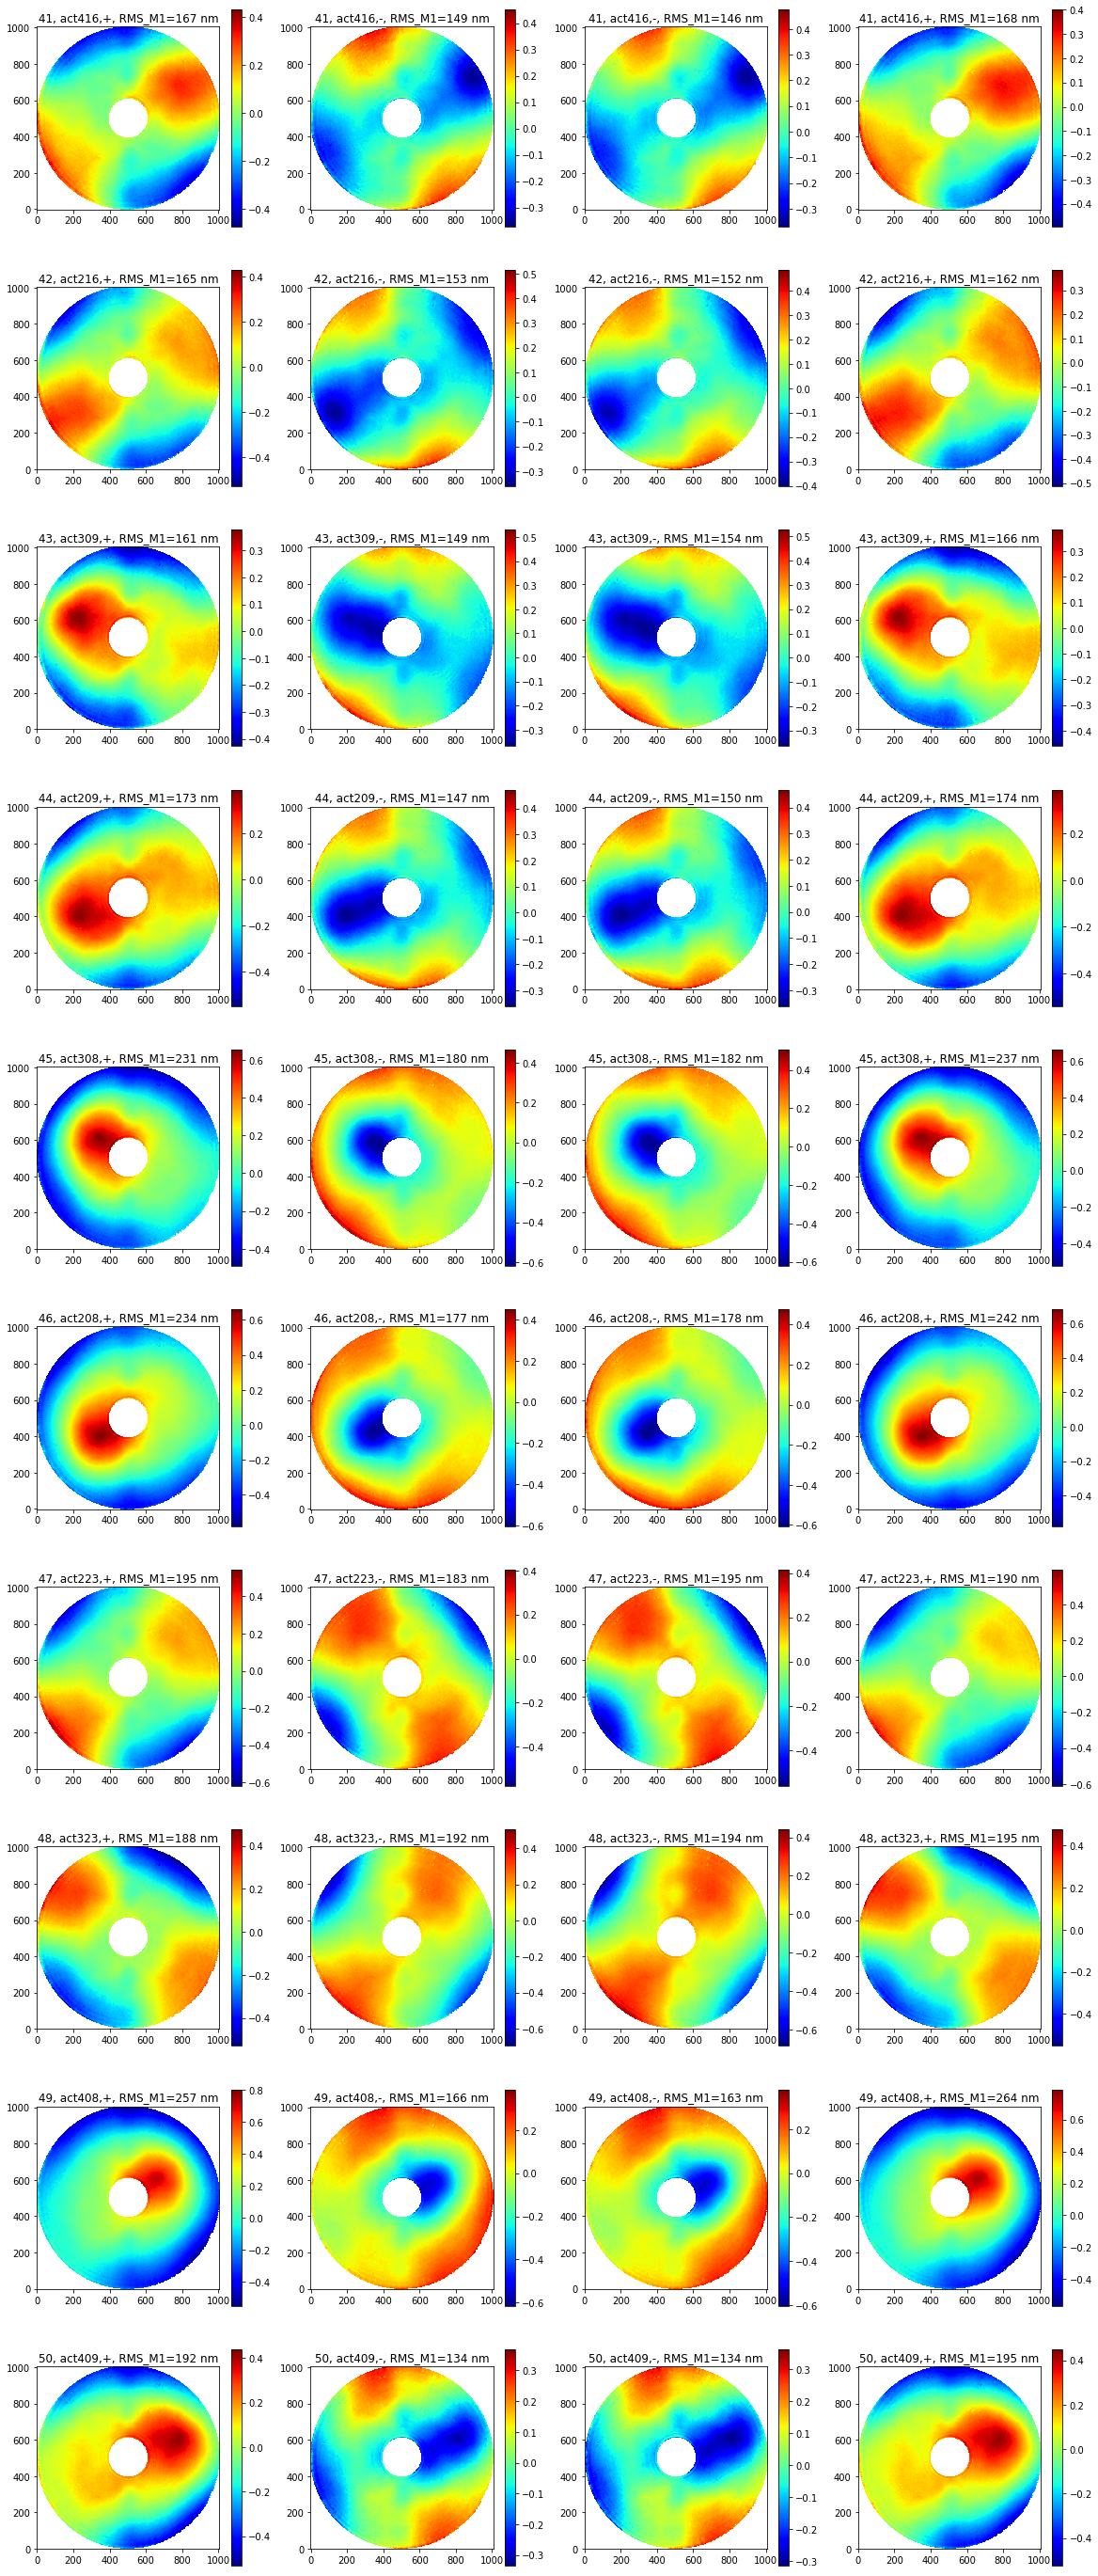

In [49]:
fig, ax = plt.subplots(nIF,4,figsize=(20,5*nIF))
i = 0
imode = 0
for modeID in np.arange(41, 51):
    imode += 1
    signedBend = ['+%d-1'%modeID, '-%d-1'%modeID, '-%d-2'%modeID, '+%d-2'%modeID]
    for bend in signedBend:
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1
        print('%s Influence function %s --- Actuator %d --- irow = %d, icol = %d, -----------------------------'%(
            testID, modeID, mode2actID[imode-1], irow, icol))
        fileset = sorted(glob.glob('%s/Processed/%d_%s/%d %s M3 if%s*burst*morph -.h5'%(
            dataDir, dateID, testID, dateID, testID, bend)))
        m3s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm

        img = ax[irow][icol].imshow(m3s, origin='lowerleft')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('%d, act%d,%s, RMS_M1=%.0f nm'%(modeID, mode2actID[imode-1], bend[0], m3rms))

### The Measured single actuator influence functions

In [50]:
from FATABLE import *

fat = np.array(FATABLE)
actID = np.int16(fat[:, FATABLE_ID])
xact = np.float64(fat[:, FATABLE_XPOSITION])
yact = np.float64(fat[:, FATABLE_YPOSITION])

4-7 bending mode 208 ------ irow = 0, icol = 0, -----------------------------
/Processed/190218_4-7/Combined/Combined M1M3 IFMap for actuator number-208.h5: date not in h5 file. 
/Processed/190218_4-7/Combined/Combined M1M3 IFMap for actuator number-208.h5: date not in h5 file. 
4-7 bending mode 209 ------ irow = 0, icol = 1, -----------------------------
/Processed/190218_4-7/Combined/Combined M1M3 IFMap for actuator number-209.h5: date not in h5 file. 
/Processed/190218_4-7/Combined/Combined M1M3 IFMap for actuator number-209.h5: date not in h5 file. 
4-7 bending mode 216 ------ irow = 0, icol = 2, -----------------------------
/Processed/190218_4-7/Combined/Combined M1M3 IFMap for actuator number-216.h5: date not in h5 file. 
/Processed/190218_4-7/Combined/Combined M1M3 IFMap for actuator number-216.h5: date not in h5 file. 
4-7 bending mode 223 ------ irow = 0, icol = 3, -----------------------------
/Processed/190218_4-7/Combined/Combined M1M3 IFMap for actuator number-223.h5: dat

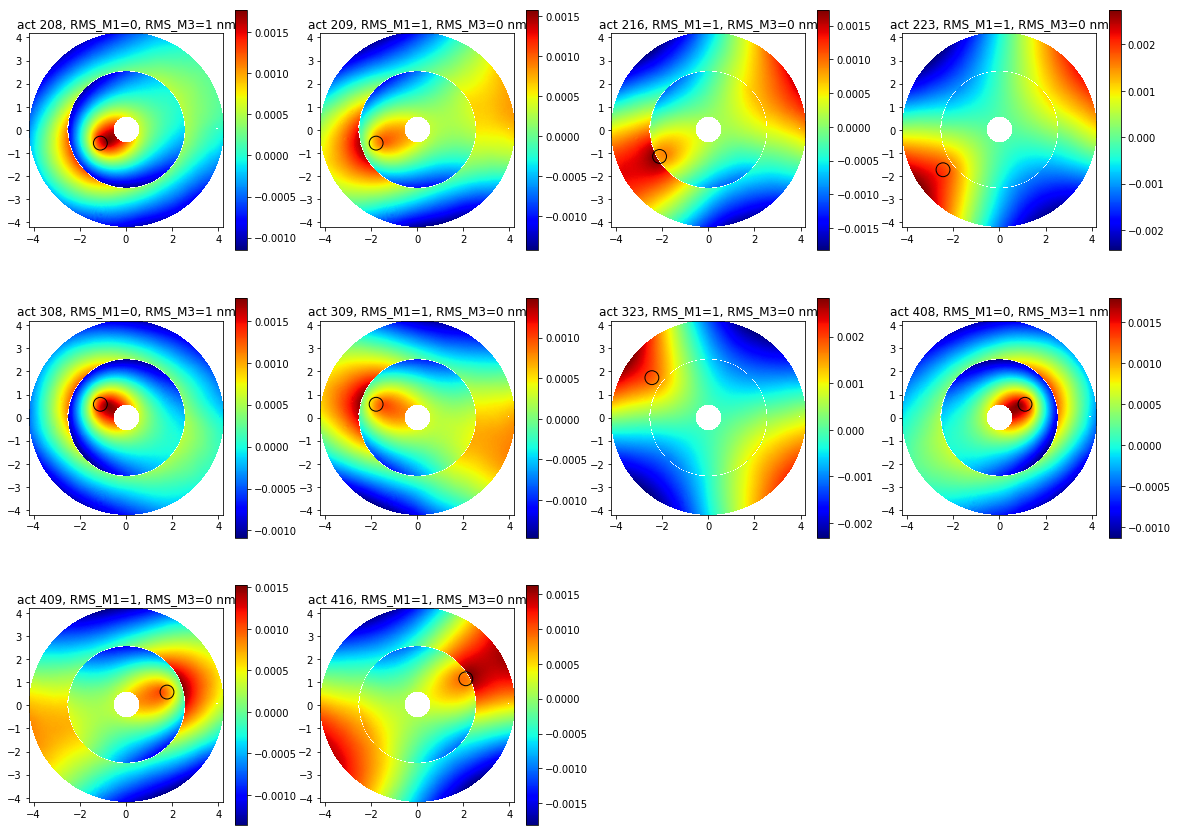

In [51]:
fig, ax = plt.subplots(3,4,figsize=(20,5*3))
i = 0
for modeID in sorted(mode2actID):
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1
    print('%s bending mode %s ------ irow = %d, icol = %d, -----------------------------'%(
        testID, modeID, irow, icol))
    fileset = sorted(glob.glob('%s/Processed/%d_%s/Combined/*number-%d.h5'%(
    dataDir, dateID, testID, modeID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset, '/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset, '/M3Data')

    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm

    img = ax[irow][icol].imshow(s, origin='lowerleft', extent = [x1[0,0], x1[0,-1], y1[0,0], y1[-1,0]])
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('act %d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(modeID, m1rms, m3rms))
    
    actIdx = np.where(actID == modeID)
    circ = Circle((xact[actIdx],yact[actIdx]),0.3, fill = False)
    ax[irow][icol].add_patch(circ)

fig.delaxes(ax.flatten()[-2])
fig.delaxes(ax.flatten()[-1])

### Scaling factors that need to be added to the FEA influence functions

In [52]:
resultsFile = glob.glob('%s/Processed/%d_%s/Combined/FittedCoeff*txt'%(
    dataDir, dateID, testID))[0]
df = pd.read_csv(resultsFile, sep="\t")
actID13 = df['Actuator']
idx = actID13>0
actID13 = actID13[idx]
scaleF = df['normalizedFit'][idx]

#update ML_IF_scale.txt
aa = np.loadtxt('data/ML_IF_scale.txt', skiprows=1)
if sum(aa[:,2]>0)==40:
    i = 0
    for act in actID13:
        idx = np.where(actID == act)[0][0]
        if aa[idx, 2]<1e-3:
            aa[idx, 2] = scaleF[i]
        else:
            aa[idx, 3] = scaleF[i]
        i+=1
    np.savetxt('data/ML_IF_scale.txt', aa, 
               header = 'actID\t scaleF_during_test \t scaleF_updated \t scaleF_repeated', 
               fmt='%.0f \t %.5f \t %.5f \t %.5f', comments='')

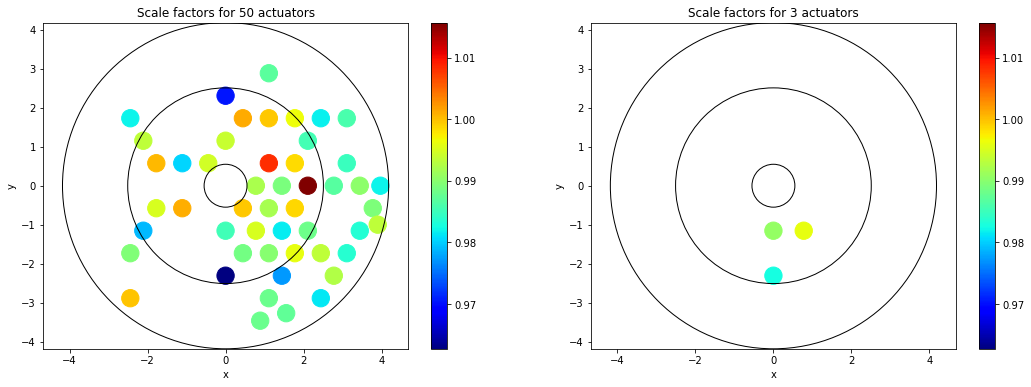

In [13]:
aa = np.loadtxt('data/ML_IF_scale.txt', skiprows=1)

fig, ax = plt.subplots(1,2,figsize=(18, 6))

for i in range(2):
    bb = aa[:,i+2] #columns 2 and 3
    bb[bb==0] = np.nan

    if i==0:
        vmin = min(bb)
        vmax = max(bb)
        bbmin = min(bb[bb>1e-5])-0.01
    #img = ax[i].scatter(xact, yact, (bb-bbmin)*1e4, bb, vmin=vmin, vmax=vmax)
    img = ax[i].scatter(xact, yact, 300, bb, vmin=vmin, vmax=vmax)

    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].axis('equal')
    ax[i].set_xlim([-m1ORC, m1ORC])
    ax[i].set_ylim([-m1ORC, m1ORC])
    plt.colorbar(img, ax=ax[i])
    ax[i].set_title('Scale factors for %d actuators'%sum(~np.isnan(bb)))

    circ = Circle((0, 0),m1ORC, fill = False)
    ax[i].add_patch(circ)
    circ = Circle((0, 0),m3ORC, fill = False)
    ax[i].add_patch(circ)
    circ = Circle((0, 0),m3IRC, fill = False)
    ax[i].add_patch(circ)

### Residual maps

4-7 bending mode 208 ------ irow = 0, icol = 0, -----------------------------
/Processed/190218_4-7/Combined/Combined M1M3 IFMap for actuator number-208 - Residual Map of Actuator 208.h5: date not in h5 file. 
/Processed/190218_4-7/Combined/Combined M1M3 IFMap for actuator number-208 - Residual Map of Actuator 208.h5: date not in h5 file. 
4-7 bending mode 209 ------ irow = 0, icol = 1, -----------------------------
/Processed/190218_4-7/Combined/Combined M1M3 IFMap for actuator number-209 - Residual Map of Actuator 209.h5: date not in h5 file. 
/Processed/190218_4-7/Combined/Combined M1M3 IFMap for actuator number-209 - Residual Map of Actuator 209.h5: date not in h5 file. 
4-7 bending mode 216 ------ irow = 0, icol = 2, -----------------------------
/Processed/190218_4-7/Combined/Combined M1M3 IFMap for actuator number-216 - Residual Map of Actuator 216.h5: date not in h5 file. 
/Processed/190218_4-7/Combined/Combined M1M3 IFMap for actuator number-216 - Residual Map of Actuator 216.

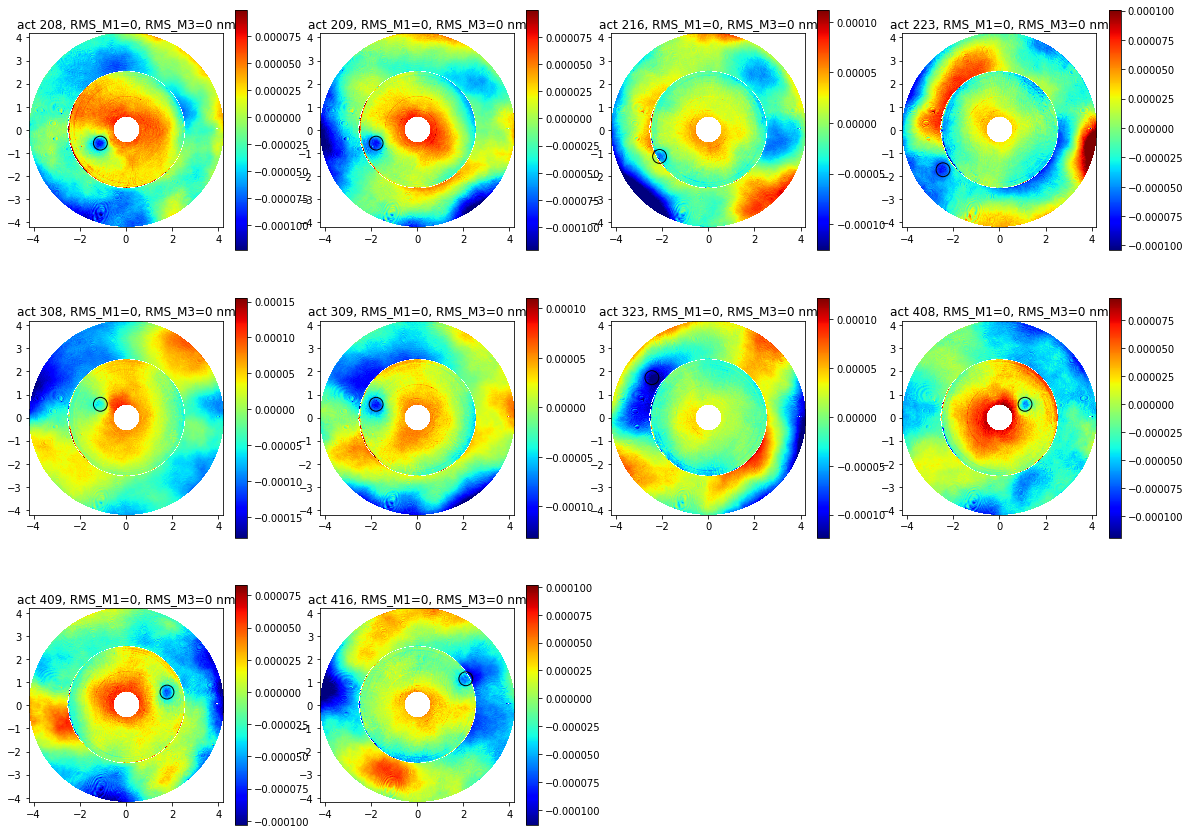

In [57]:
testID = '4-7' 
fig, ax = plt.subplots(3,4,figsize=(20,5*3))
i = 0
for modeID in sorted(mode2actID):
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1
    print('%s bending mode %s ------ irow = %d, icol = %d, -----------------------------'%(
        testID, modeID, irow, icol))
    fileset = sorted(glob.glob('%s/Processed/%d_%s/Combined/*Residual*%d.h5'%(
    dataDir, dateID, testID, modeID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset, '/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset, '/M3Data')

    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm

    vmean = np.mean(s[~np.isnan(s)])
    vmin = vmean-3*np.std(s[~np.isnan(s)]-vmean)
    vmax = vmean+3*np.std(s[~np.isnan(s)]-vmean)
    
    img = ax[irow][icol].imshow(s, origin='lower', extent = [x1[0,0], x1[0,-1], y1[0,0], y1[-1,0]], vmin=vmin, vmax=vmax)
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('act %d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(modeID, m1rms, m3rms))
    
    actIdx = np.where(actID == modeID)[0][0]
    circ = Circle((xact[actIdx],yact[actIdx]),0.3, fill = False)
    ax[irow][icol].add_patch(circ)

fig.delaxes(ax.flatten()[-2])
fig.delaxes(ax.flatten()[-1])    

### Another round of optimization? Not sure what data these are. There is no M3 map.
There is no mention of this in any of the notes we took, including Chris' notes on confluence, Doug's notes, and Bo's notes.

4-8 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190218_4-8 Optimize/M1 set0 190218 4-8.h5: Mon Feb 18 13:39:22 2019 
4-8 bend1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190218_4-8 Optimize/M1 set1 190218 4-8.h5: Mon Feb 18 13:52:21 2019 


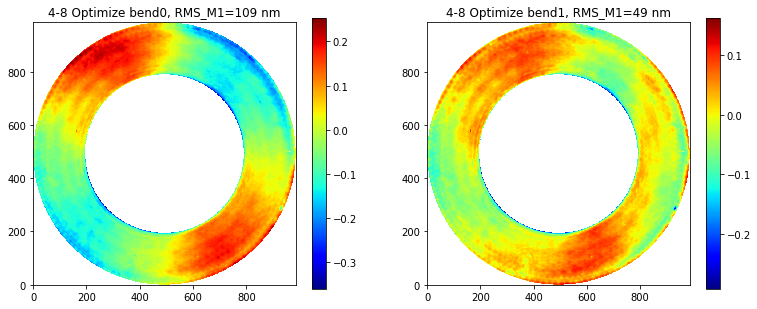

In [60]:
testID = '4-8'
iter = ' Optimize'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(2):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    if len(fileset) == 0:
        pass
    else:
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)

    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[icol].imshow(m1s, origin='lowerleft')
        ax[icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])

fig.delaxes(ax.flatten()[-1])  